In [2]:
import pandas as pd
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [3]:
trainweek = pd.read_excel(r"G:\traindata\yddata\yd_weeksale.xlsx")

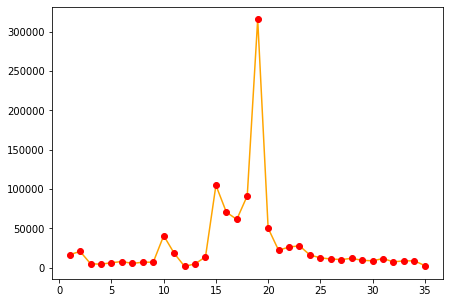

In [4]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.plot(trainweek['week'],trainweek['money'],c="orange",label= "Data")
ax.plot(trainweek['week'],trainweek['money'],'ro')
# plt.xticks(rotation=90)
plt.show()

In [5]:
X = trainweek['week']
X = X.values.reshape(-1, 1)
y = trainweek['money']
y = y.values.reshape(-1, 1)
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=440)
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

-0.6597329466546629

In [6]:
trainmonth = pd.read_excel(r"G:\traindata\yddata\yd_monthsale.xlsx")

<function matplotlib.pyplot.show(*args, **kw)>

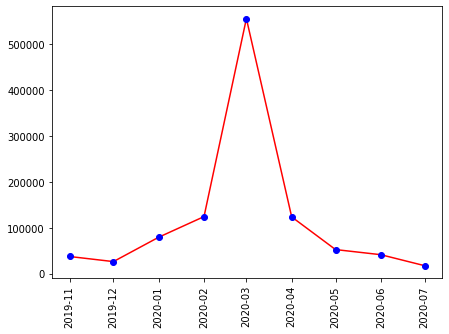

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)
ax.plot(trainmonth['partdate'],trainmonth['money'],'r-')
ax.plot(trainmonth['partdate'],trainmonth['money'],'bo')
plt.xticks(rotation=90)
plt.show

In [8]:
trainmonth  = pd.DataFrame(trainmonth)
X = trainmonth['partdate']
X = X.apply(pd.to_datetime)
# X = X.values.reshape(-1,1)
X = X.map(dt.datetime.toordinal)
X = X.values.reshape(-1, 1)
X

array([[737364],
       [737394],
       [737425],
       [737456],
       [737485],
       [737516],
       [737546],
       [737577],
       [737607]], dtype=int64)

In [9]:
y = trainmonth.iloc[:,-1]
# y.head(10)
y = y.values.reshape(-1, 1)
y

array([[1.    ],
       [0.871 ],
       [0.8333],
       [0.9091],
       [0.9032],
       [0.7333],
       [0.8   ],
       [0.9667],
       [0.7857]])

In [10]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3)

In [11]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)#添加多项式回归，增加拟合程度
Xtrain_poly = poly.fit_transform(Xtrain)#分别对训练集和测试集进行处理
Xtest_poly = poly.fit_transform(Xtest)#
X_poly = poly.fit_transform(X)
Xtest_poly

array([[7.37577000e+05, 5.44019831e+11],
       [7.37394000e+05, 5.43749911e+11],
       [7.37425000e+05, 5.43795631e+11]])

In [12]:
model = LinearRegression(normalize=True).fit(Xtrain_poly,Ytrain)
j = model.score(Xtest_poly,Ytest)
j

-4.3378736093229495

In [13]:
y_pre = model.predict(Xtest_poly)
y_pre

array([[0.78128415],
       [0.96410228],
       [0.91956077]])

In [14]:
Y_pre = model.predict(X_poly)

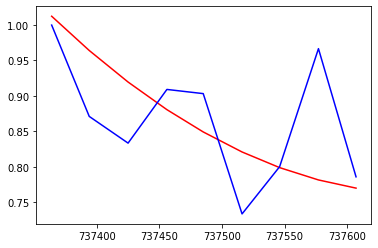

In [15]:
plt.plot(X,Y_pre,'r-')
plt.plot(X,y,'b-')
plt.show()

In [16]:
reg = LinearRegression().fit(Xtrain,Ytrain)

In [17]:
y_predict =reg.predict(Xtest)
y_predict

array([[0.77306744],
       [0.9579032 ],
       [0.92659222]])

In [18]:
reg.score(Xtrain,Ytrain)

0.7167450749307869

<function matplotlib.pyplot.show(*args, **kw)>

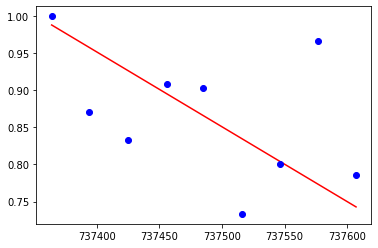

In [19]:
y_hat = reg.predict(X)
plt.plot(X,y_hat,'r-')
plt.plot(X,y,'bo')
plt.show

In [20]:
reg_coef = reg.coef_     #截距
reg_intercept = reg.intercept_ #斜率
X_test = pd.DataFrame(np.array([
   ['2020-07-21'],], dtype='datetime64[ns]'))
X_test.columns = ["Date"]
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
X_test['Date']
prediction = reg_coef*int(X_test['Date'])+reg_intercept
prediction

array([[0.72256587]])

In [21]:
mod_coef = model.coef_     #截距
mod_coef

array([[-4.24946597e+00,  2.88037321e-06]])

In [22]:
mod_intercept = model.intercept_ #斜率

In [23]:
X_test = pd.DataFrame(np.array([
   ['2020-05-01'],], dtype='datetime64[ns]'))
X_test.columns = ["Date"]
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
X_test['Date']

0    737546
Name: Date, dtype: int64

In [24]:
X_input = X_test['Date'].apply(pd.to_datetime)
# X = X.values.reshape(-1,1)
X_input = X_input.map(dt.datetime.toordinal)
X_input =X_input.values.reshape(-1, 1)
X_input_poly = poly.fit_transform(X_input.reshape(-1,1))
X_input_poly

array([[7.19163000e+05, 5.17195421e+11]])

In [25]:
y_predict = model.predict(X_input_poly)
y_predict

array([[986.13449992]])

In [26]:
trainday = pd.read_excel(r"G:\traindata\yddata\yd_daysale.xlsx")

<function matplotlib.pyplot.show(*args, **kw)>

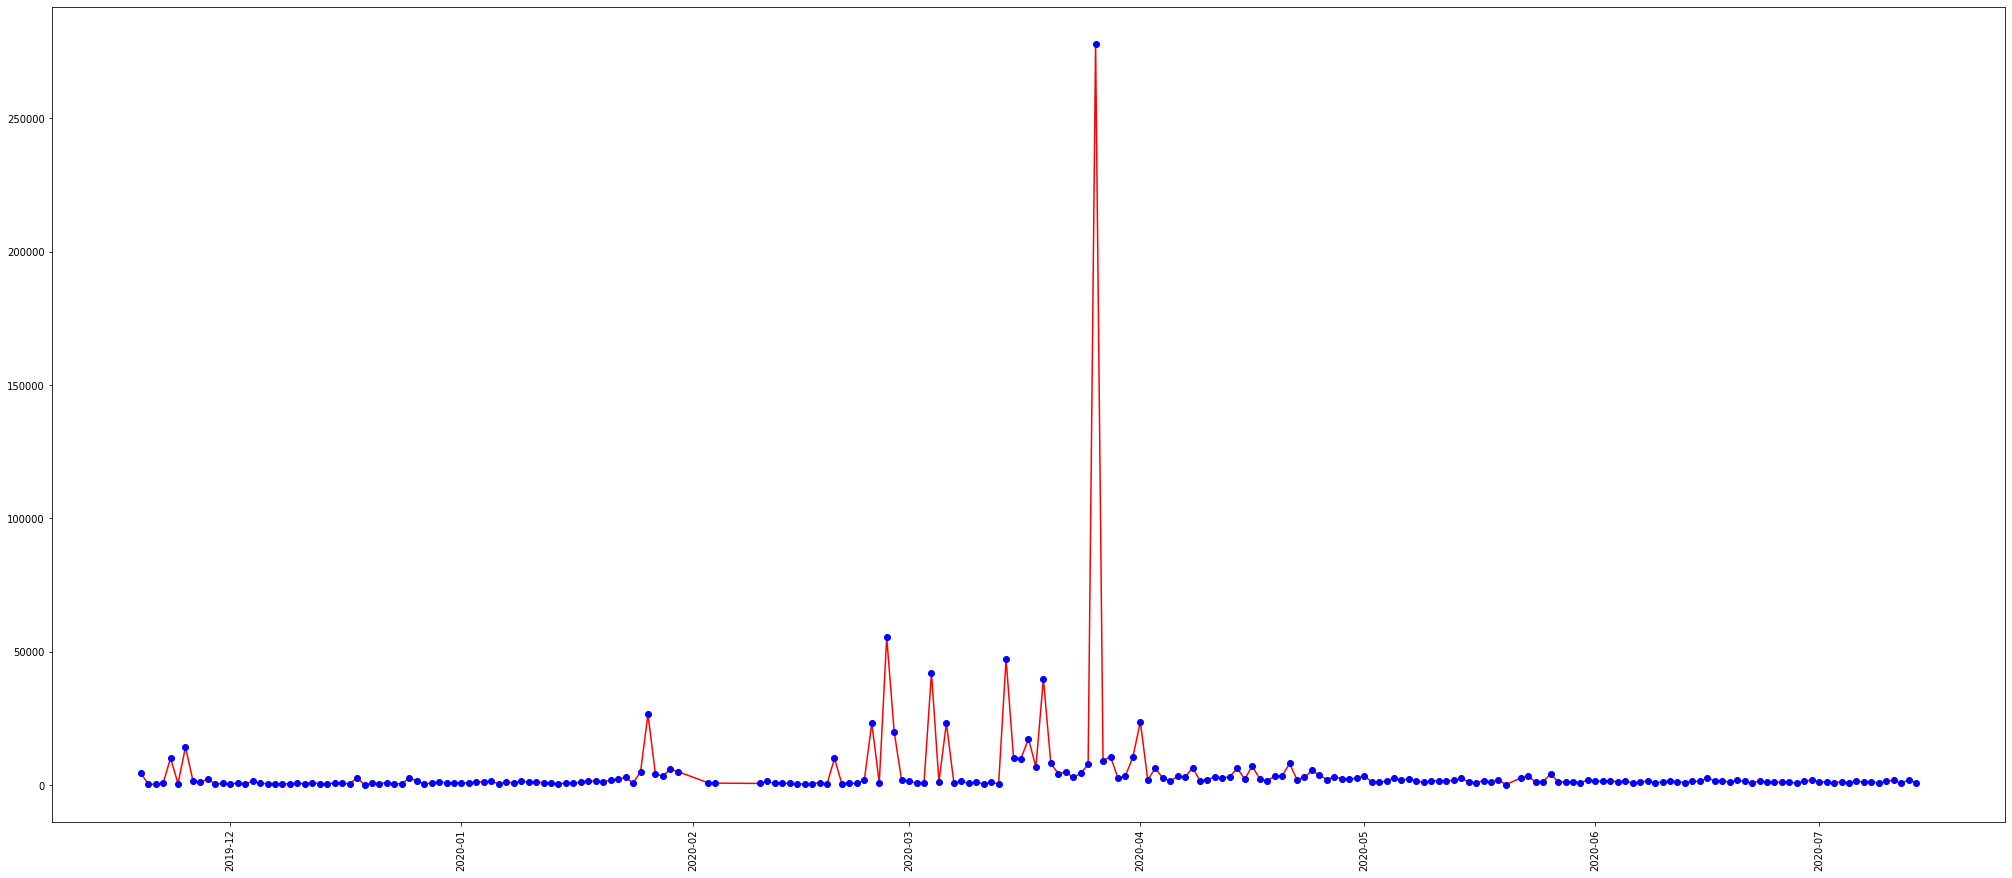

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(35, 15))
ax = fig.add_subplot(111)
ax.plot(trainday['saledate'],trainday['money'],'r-')
ax.plot(trainday['saledate'],trainday['money'],'bo')
plt.xticks(rotation=90)
plt.show

In [28]:
trainday  = pd.DataFrame(trainday)
X = trainday['saledate']
X = X.apply(pd.to_datetime)
# X = X.values.reshape(-1,1)
X = X.map(dt.datetime.toordinal)
X = X.values.reshape(-1, 1)

In [29]:
y = trainday.iloc[:,-1]
# y.head(10)
y = y.values.reshape(-1, 1)

In [30]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.3,random_state=320)
reg = LinearRegression().fit(Xtrain,Ytrain)
reg.score(Xtrain,Ytrain)

0.00048756632198454497

ValueError: x and y must have same first dimension, but have shapes (69, 1) and (9, 1)

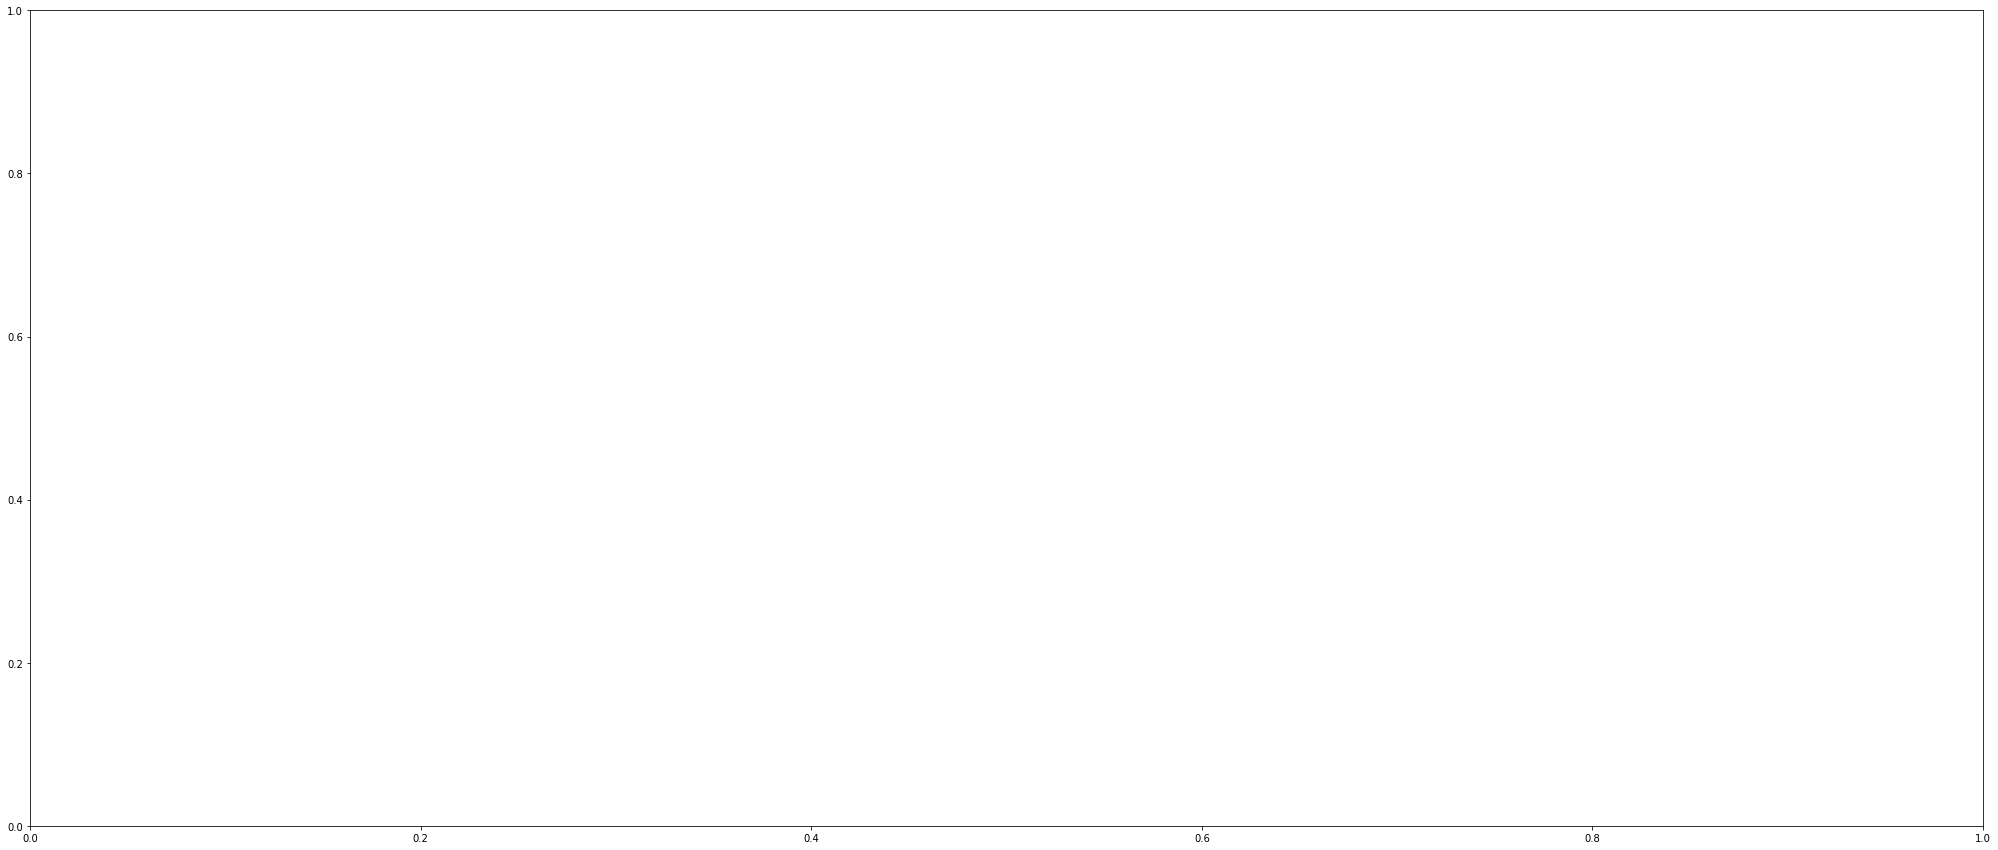

In [31]:
fig = plt.figure(figsize=(35, 15))
ax = fig.add_subplot(111)
ax.plot(Xtest,Y_pre,'ro')
ax.plot(Xtest,Ytest,'bo')
plt.xticks(rotation=90)
plt.show

In [ ]:
reg_coef = reg.coef_     #截距
reg_intercept = reg.intercept_ #斜率
X_test = pd.DataFrame(np.array([
   ['2020-07-01'],], dtype='datetime64[ns]'))
X_test.columns = ["Date"]
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
X_test['Date']

In [136]:
prediction = reg_coef*int(X_test['Date'])+reg_intercept
prediction

array([[3173.84490794]])

In [140]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=False)#添加多项式回归，增加拟合程度
Xtrain_poly = poly.fit_transform(Xtrain)#分别对训练集和测试集进行处理
Xtest_poly = poly.fit_transform(Xtest)#
X_poly = poly.fit_transform(X)

array([[7.37410000e+05, 5.43773508e+11],
       [7.37424000e+05, 5.43794156e+11],
       [7.37546000e+05, 5.43974102e+11],
       [7.37617000e+05, 5.44078839e+11],
       [7.37382000e+05, 5.43732214e+11],
       [7.37525000e+05, 5.43943126e+11],
       [7.37388000e+05, 5.43741063e+11],
       [7.37438000e+05, 5.43814804e+11],
       [7.37594000e+05, 5.44044909e+11],
       [7.37560000e+05, 5.43994754e+11],
       [7.37401000e+05, 5.43760235e+11],
       [7.37474000e+05, 5.43867901e+11],
       [7.37496000e+05, 5.43900350e+11],
       [7.37610000e+05, 5.44068512e+11],
       [7.37532000e+05, 5.43953451e+11],
       [7.37422000e+05, 5.43791206e+11],
       [7.37565000e+05, 5.44002129e+11],
       [7.37505000e+05, 5.43913625e+11],
       [7.37413000e+05, 5.43777933e+11],
       [7.37396000e+05, 5.43752861e+11],
       [7.37572000e+05, 5.44012455e+11],
       [7.37439000e+05, 5.43816279e+11],
       [7.37581000e+05, 5.44025732e+11],
       [7.37567000e+05, 5.44005079e+11],
       [7.375870

In [141]:
model = LinearRegression(normalize=True).fit(Xtrain_poly,Ytrain)
j = model.score(Xtest_poly,Ytest)

0.004483623057031316

In [142]:
y_pre = model.predict(Xtest_poly)

array([[ 1820.37796021],
       [ 2951.88571167],
       [ 4679.13140869],
       [-1032.57980347],
       [-1019.08706665],
       [ 5421.48648071],
       [ -345.92675781],
       [ 3891.24362183],
       [ 1358.84957886],
       [ 3944.04067993],
       [  991.51324463],
       [ 5424.41470337],
       [ 5735.88522339],
       [ -249.85351562],
       [ 5222.07223511],
       [ 2802.00604248],
       [ 3634.94128418],
       [ 5726.54525757],
       [ 2079.01980591],
       [  496.72036743],
       [ 3161.02728271],
       [ 3950.98791504],
       [ 2481.12362671],
       [ 3504.43911743],
       [ 1983.73846436],
       [ 1076.33465576],
       [ 1182.56790161],
       [ 4543.47195435],
       [ 1265.65829468],
       [  883.08966064],
       [ 3239.88082886],
       [ 1542.29104614],
       [ 2868.65142822],
       [ 5448.86621094],
       [ 5398.98287964],
       [ 4729.51004028],
       [ 3706.12854004],
       [  382.82080078],
       [ 4811.6517334 ],
       [ 5494.82809448],


<function matplotlib.pyplot.show(*args, **kw)>

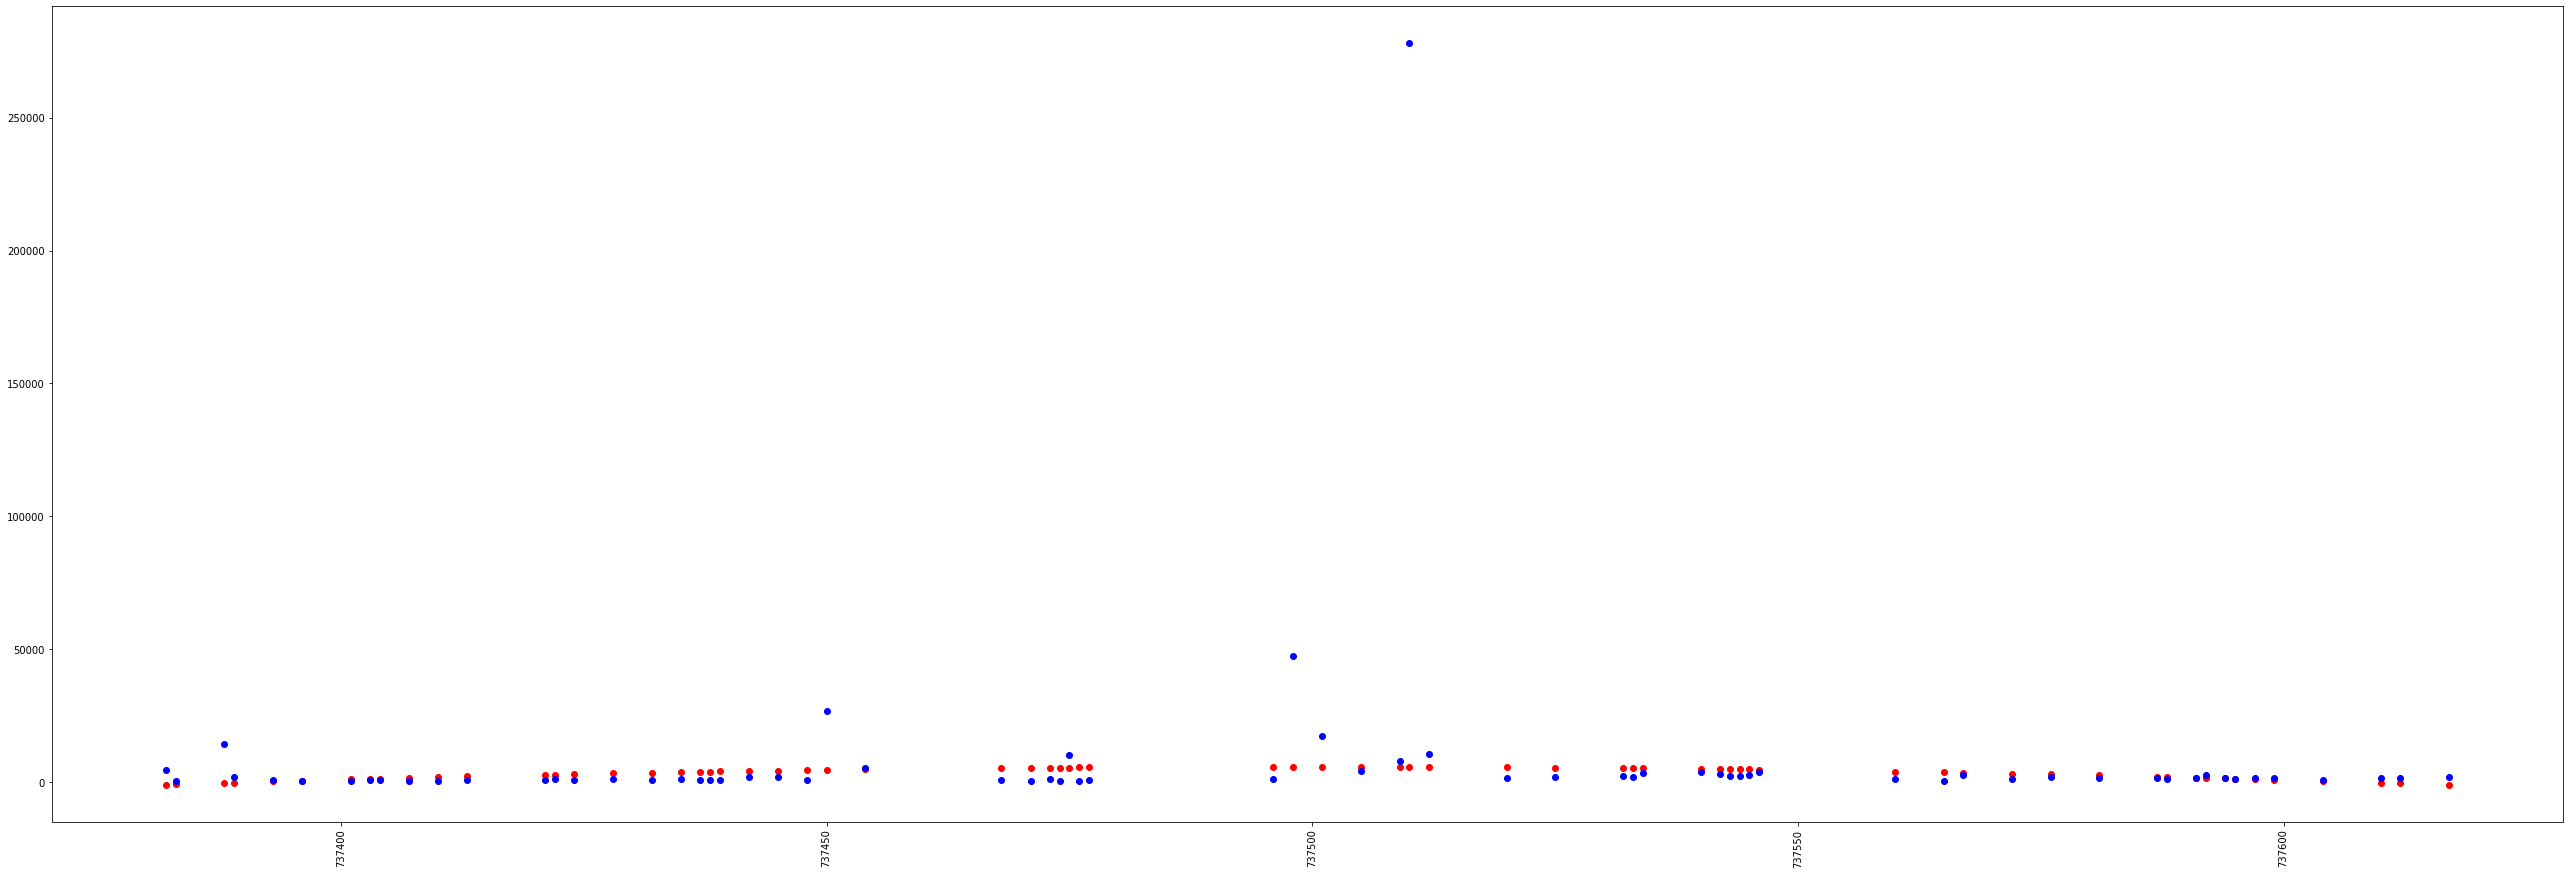

In [146]:
fig = plt.figure(figsize=(45, 15))
ax = fig.add_subplot(111)
ax.plot(Xtest,y_pre,'ro')
ax.plot(Xtest,Ytest,'bo')
plt.xticks(rotation=90)
plt.show

In [147]:
from sklearn.metrics import r2_score
r2_score(Ytest,y_pre)

0.004483623057031316

In [150]:
X_test = pd.DataFrame(np.array([
   ['2020-07-01'],], dtype='datetime64[ns]'))
X_test.columns = ["Date"]
X_test['Date'] = pd.to_datetime(X_test['Date'])
X_test['Date']=X_test['Date'].map(dt.datetime.toordinal)
X_test['Date']
X_input = X_test['Date'].apply(pd.to_datetime)
# X = X.values.reshape(-1,1)
X_input = X_input.map(dt.datetime.toordinal)
X_input =X_input.values.reshape(-1, 1)
X_input_poly = poly.fit_transform(X_input.reshape(-1,1))
X_input_poly

array([[7.19163000e+05, 5.17195421e+11]])

In [152]:
y_predict = model.predict(X_input_poly)
y_predict

array([[-1.64804456e+08]])